# Titanic Suvivior Data Analysis

Project 2 for Udacity Data Analyst Nanodegree

The goal of this project is to analysis the titanic dataset, which is obtained from the [Kaggle website](https://www.kaggle.com/c/titanic/data). The data file contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 

In [608]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load data from csv
df = pd.read_csv("titanic_data.csv")

Populating the interactive namespace from numpy and matplotlib


First, I want to check if the data is properly loaded and what we have in the dataset.

In [182]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [183]:
print df.columns, len(df.columns)

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object') 12


Okay, we can see that there are 12 columns with different data for individual passenger. And for me, the most interesting data are for age, sex, and class. As everyone knows, that there are many more female who survived the tragedy, I would like to first confirm that base on the data we obtained and then check if age and class are also important indicator for the passengers' chance for survival. 

In [184]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [225]:
survived_ct = df['Survived'].sum()
survival_rate = df['Survived'].mean()
inThirdClassP = float(len(df[df.Pclass == 3]))/len(df)
print "Total Number of Passengers: {}".format(len(df))
print "Total Number of People Survived: {}".format(survived_ct)
print "Survival Rate: {0:.2f}%".format(survival_rate*100)
print "Pecentages of People in third class: {0:.2f}%".format(inThirdClassP*100)


Total Number of Passengers: 891
Total Number of People Survived: 342
Survival Rate: 38.38%
Pecentages of People in third class: 55.11%


Now we learnt that the survivor rate is 38.38% because the mean of Survived field is 0.3838. And 55% of people on boat were in the third class.<br>
Besides, we see that there are only 204 records in the Cabin field, which means a lot of missing data, however, as my own interest in not in this set of data, I will leave it as it is. 

**Some data points that stand out**:
- The minimum age is 0.42, which is strange as other's age are in integer.
- The maximam age is 80, which is possible but not likely.
- The max fare is 512.329, which is significantly higher than the average.
- The zero ticket fare.<br>

Let's check if they are correct input. 

In [187]:
min_age = df.Age.argmin()
print df.iloc[min_age]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object


I did a Google serach for this passenger and confirmed that he is indeed a four month old child when he embarked the ship. Therefore, this input is correct.

In [188]:
max_age = df.Age.argmax()
print df.iloc[max_age]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                             30
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object


According to the google search result, this is a piece of bad data. The passenger was 47 at the time [[Ref]](http://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html). Therefore, I will correct the data here.

In [189]:
df.loc[630,'Age'] = 47.0

In [190]:
# Check if the data is changed.
df.loc[630,'Age']

47.0

In [191]:
# Check the expensive fare
expensive_fare = df[df.Fare > 500]
expensive_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


There are three people bought the 512 dollar ticket and they are all in first class, therefore it should to be correct. The further google search also confirmed it.

In [192]:
zero_fare = df[df.Fare == 0]
zero_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


All people but one who recorded fare at 0 have lost their life during the tragedy. I googled the top 5 passengers listed in the form but failed to find their fare information. As I won't focus on fare I will leave it as it is. 

As passenger's sex is recorded in string format, it is not easy to manipulate, therefore, I will change it to int, using 0 to present "male" and 1 for "female".

In [193]:
def std_gender(input):
    if input == "male":
        return 0
    elif input == "female":
        return 1
    else:
        return input

# make copy of the old data
old_df = df
df = df.applymap(std_gender)

In [194]:
# check if the data is updated
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [195]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.652899,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.418327,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,74.000000,8.000000,6.000000,512.329200


### Explore the data

I am interested in **Age**, **Pclass**, and **Sex** of passengers and how they affect the passenger's chance for survival. 

In [264]:
# Pearson Correlation Test
df[["Survived","Pclass","Age","Sex"]].corr(method='pearson', min_periods=1)

,Survived,Pclass,Age,Sex
Survived,1.000000,-0.338481,-0.081679,0.543351
Pclass,-0.338481,1.000000,-0.367260,-0.131900
Age,-0.081679,-0.367260,1.000000,-0.091518
Sex,0.543351,-0.131900,-0.091518,1.000000


From the "Survived" row we learnt that overall there are a weak negative correlation between **Pclass** and **Surival** (r = -0.338481), no correlation between **Age** and **Survival** (r = -0.081679), and a moderate correlation between **Sex** and **Survival** (r = 0.543351). 

In [279]:
firstClass = df[df.Pclass == 1]
secondClass = df[df.Pclass == 2]
thirdClass = df[df.Pclass == 3]
print ""
print "First Class - Pearson" 
print firstClass[["Survived","Age","Sex"]].corr(method='pearson', min_periods=1)
print ""
print "Second Class - Pearson"
print secondClass[["Survived","Age","Sex"]].corr(method='pearson', min_periods=1)
print ""
print "Third Class - Pearson"
print thirdClass[["Survived","Age","Sex"]].corr(method='pearson', min_periods=1)


First Class - Pearson
          Survived       Age       Sex
Survived  1.000000 -0.282562  0.615212
Age      -0.282562  1.000000 -0.218587
Sex       0.615212 -0.218587  1.000000

Second Class - Pearson
          Survived       Age       Sex
Survived  1.000000 -0.273507  0.753121
Age      -0.273507  1.000000 -0.071507
Sex       0.753121 -0.071507  1.000000

Third Class - Pearson
          Survived       Age       Sex
Survived  1.000000 -0.202102  0.387313
Age      -0.202102  1.000000 -0.172537
Sex       0.387313 -0.172537  1.000000


After dividing the passengers by the class they are in, we see a stronger correlation between the **Sex** and **Survival** in the first and second classes (r = 0.615212, r = 0.753121). And we also see negative moderate correlation between the **Age** and **Survival** in the first two classes (r = -0.282562 r = -0.273507)

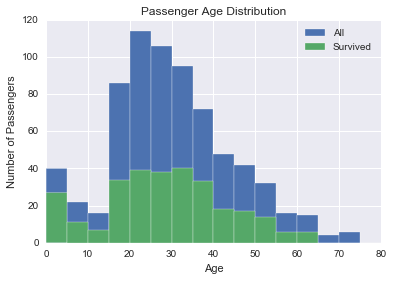

In [486]:
# Age Distribution
surv = df[df.Survived ==1]
common_params = dict(bins=16, range=(0, 80),edgecolor = "white")
plt.title('Passenger Age Distribution')
plt.hist(df.Age.values, **common_params)
plt.hist(surv.Age.values, **common_params)
plt.legend(["All","Survived"])
plt.ylabel("Number of Passengers")
plt.xlabel("Age")
plt.show()


- Passengers under 5 have a survival rate of 70.45%
- Passengers between 5 and 15 have a survival rate of 46.15% 
- Passengers between 15 to 50 have a survival rate of 38.73%
- Passengers between 50 to 65 have a survival rate of 37.50%
- Passengers over 65 have a survival rate of 0.00%
- Overall survival rate is 38.38%.


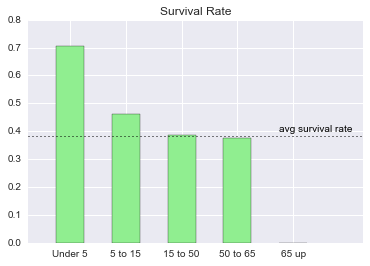

In [411]:
psg_under_5 = df[df.Age <=5]
psg_5_15 = df[(df.Age >5)&(df.Age <=15)]
psg_15_65 = df[(df.Age >15)&(df.Age <=65)]
psg_over_65 = df[df.Age >65]
psg_15_50 = df[(df.Age >15)&(df.Age <=50)]
psg_50_65 = df[(df.Age >50)&(df.Age <=65)]
surv_rate_under_5 = psg_under_5["Survived"].mean()
surv_rate_5_15 = psg_5_15["Survived"].mean()
surv_rate_15_50 = psg_15_50["Survived"].mean()
surv_rate_50_65 = psg_50_65["Survived"].mean()
surv_rate_over_65 = psg_over_65["Survived"].mean()
surv_rate_all = df["Survived"].mean()
print """
- Passengers under 5 have a survival rate of {0:.2f}%
- Passengers between 5 and 15 have a survival rate of {1:.2f}% 
- Passengers between 15 to 50 have a survival rate of {2:.2f}%
- Passengers between 50 to 65 have a survival rate of {3:.2f}%
- Passengers over 65 have a survival rate of {4:.2f}%
- Overall survival rate is {5:.2f}%.""".format(surv_rate_under_5*100,
                                               surv_rate_5_15*100, 
                                               surv_rate_15_50*100, 
                                               surv_rate_50_65*100,
                                               surv_rate_over_65*100,
                                               surv_rate_all*100)
surv_rate = [surv_rate_under_5,surv_rate_5_15,surv_rate_15_50,surv_rate_50_65,surv_rate_over_65]
fig = plt.figure()
ax = fig.add_subplot(111)
ind = np.arange(5)
width = 0.5
ax.set_xlim(-width,len(ind)+width)
rect = ax.bar(ind,surv_rate,width,color = "lightgreen")
xTickMarks = ["Under 5","5 to 15","15 to 50", "50 to 65", "65 up"]
ax.set_xticks(ind+width/2)
xtickNames = ax.set_xticklabels(xTickMarks)
ax.axhline(y=surv_rate_all, linewidth=1, color='black', ls=':')
ax.text( 4,0.4,'avg survival rate',color='black')
plt.setp(xtickNames,fontsize=10)
plt.title("Survival Rate")

plt.show()

In [354]:
print "Passengers under 5"
print child_under_5[["Survived","Pclass","Sex"]].corr(method='pearson', min_periods=1).head(1)
print ""
print "Passengers between 5 to 15"
print child_5_15[["Survived","Pclass","Sex"]].corr(method='pearson', min_periods=1).head(1)
print ""
print "Passengers between 15 to 50"
print psg_15_50[["Survived","Pclass","Sex"]].corr(method='pearson', min_periods=1).head(1)
print ""
print "Passengers between 50 to 65"
print psg_50_65[["Survived","Pclass","Sex"]].corr(method='pearson', min_periods=1).head(1)
print ""
print "Overall"
print df[["Survived","Pclass","Sex"]].corr(method='pearson', min_periods=1).head(1)

Passengers under 5
          Survived    Pclass      Sex
Survived       1.0 -0.291355  0.12013

Passengers between 5 to 15
          Survived    Pclass       Sex
Survived       1.0 -0.548703  0.191492

Passengers between 15 to 50
          Survived    Pclass      Sex
Survived       1.0 -0.422703  0.56798

Passengers between 50 to 65
          Survived   Pclass       Sex
Survived       1.0 -0.29616  0.772126

Overall
          Survived    Pclass       Sex
Survived       1.0 -0.338481  0.543351


In [412]:
psg_over_65

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",0,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",0,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",0,71.0,0,0,PC 17609,49.5042,NaN,C
672,673,0,2,"Mitchell, Mr. Henry Michael",0,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",0,74.0,0,0,347060,7.7750,NaN,S


Children under 15 years old's survival data have less correlation with Sex (r = 0.12013 and r = 0.191492). 
On the other hand, for children between 5 to 15 years old, the class they are in have stronger negative correlation with the class they are in (r = -0.548703). <br>
For passengers between the age 15 to 50, both class and Sex is moderately corellated to their survival (r = -0.422703  and r = 0.56798) .<br>
For older passengers between the age 50 to 65, we see strong correlation between sex and survival (r = 0.772126).<br>
And people over 65 are all dead, and all of them are male. 

In [473]:
# Get the general info about passengers group by different gender. (note: 0 is male and 1 is female.)
df.groupby(["Pclass","Sex"])[["Survived","Age"]].mean()

Survived        Age
Pclass Sex                     
1      0    0.368852  40.954653
       1    0.968085  34.611765
2      0    0.157407  30.740707
       1    0.921053  28.722973
3      0    0.135447  26.507589
       1    0.500000  21.750000

In [477]:
df.groupby("Sex")["Pclass"].count()

Sex
0    577
1    314
Name: Pclass, dtype: int64

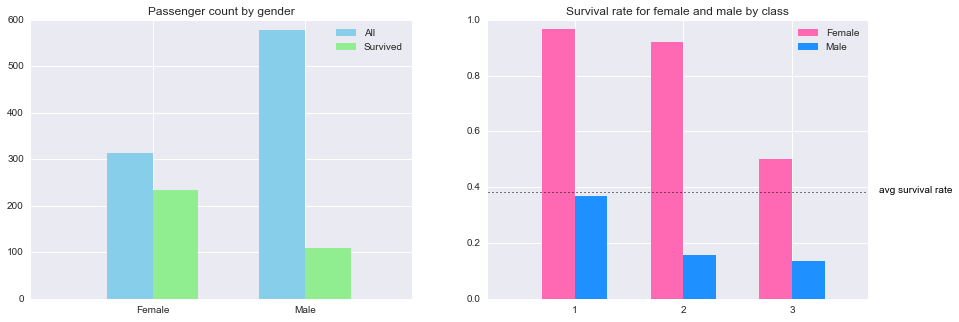

In [467]:
# Female and male survial rate by class
man = df[df['Sex'] == 0]
woman = df[df['Sex'] == 1]
man_surv_rate_by_class = man.groupby("Pclass").Survived.sum().astype('float64')/man.groupby("Pclass").Survived.count()
woman_surv_rate_by_class = woman.groupby("Pclass").Survived.sum().astype('float64')/woman.groupby("Pclass").Survived.count()


fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
x_pos = np.arange(len(df.groupby("Sex")))
width = 0.3
all_bar = ax1.bar(x_pos, [len(woman),len(man)],width, edgecolor='none', color="skyblue",label = 'All')
surv_bar = ax1.bar(x_pos+width, [len(woman[woman.Survived ==1]),len(man[man.Survived ==1])],width,edgecolor='none', 
                                 color = "lightgreen", label = 'Survived')
ax1.set(xticks=x_pos + width, xticklabels=["Female","Male"], xlim=[-0.5, len(x_pos)])
ax1.set_title('Passenger count by gender')
ax1.legend(loc='best')


ax2 = fig.add_subplot(122)
x_pos = np.arange(len(man.groupby("Pclass")))
width = 0.3
woman_bar = ax2.bar(x_pos, woman_surv_rate_by_class , width, edgecolor='none', color='hotpink', label='Female')
man_bar = ax2.bar(x_pos + width, man_surv_rate_by_class, width, edgecolor='none', color='dodgerblue', label='Male')
ax2.set(xticks=x_pos + width, xticklabels=man.groupby("Pclass").sum().index, xlim=[-0.5, len(x_pos)])
ax2.axhline(y=surv_rate_all, linewidth=1, color='black', ls=':')
ax2.text( 3.1,0.38,'avg survival rate',color='black')
ax2.set_title('Survival rate for female and male by class')
ax2.legend(loc='best')


We can see from the form and graph above that there are many more male (577 in total) on the boat than female (314 in total) while there are more female who survived than man. <br>
We also learnt that the survival rate are also different by class. Though all female passengers enjoy a higer survival rate than average, the survival rate for passengers in the first two classes are a much higher at 0.968085 and 0.921053 respectively. <br> For male passengers, on the other hand, if they travel in the first class, then their survival rate can almost match the average survival rate;however, the male passsengers in second or third class have almost the same low survival rate at 0.157407 and 0.135447.

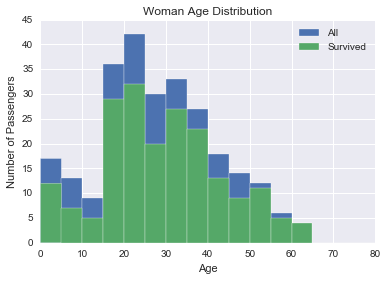

In [495]:
woman_surv = woman[woman.Survived ==1]
common_params = dict(bins=16, range=(0, 80),edgecolor = "white")
plt.title('Woman Age Distribution')
plt.hist(woman.Age.values, **common_params)
plt.hist(woman_surv.Age.values, **common_params)
plt.legend(["All","Survived"])
plt.ylabel("Number of Passengers")
plt.xlabel("Age")
plt.show()

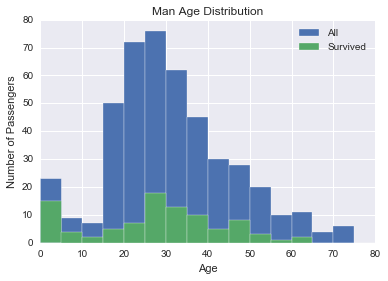

In [534]:
woman_surv = woman[woman.Survived ==1]
common_params = dict(bins=16, range=(0, 80),edgecolor = "white")
plt.title('Man Age Distribution')
plt.hist(man.Age.values, **common_params)
plt.hist(man_surv.Age.values, **common_params)
plt.legend(["All","Survived"])
plt.ylabel("Number of Passengers")
plt.xlabel("Age")
plt.show()

In [535]:
print woman[["Survived","Pclass"]].corr(method='pearson', min_periods=1).head(1)
print 
print man[["Survived","Pclass"]].corr(method='pearson', min_periods=1).head(1)

          Survived    Pclass
Survived       1.0 -0.477114

          Survived    Pclass
Survived       1.0 -0.220618


Female's survival rate has stronger negative correlation with the class than male with r = -0.477114, which means that woman is more likely to survive as the class number get smaller (i.e. they are in the first and second class). There is only a weak correlation at r = -0.220618 for the male passenger.

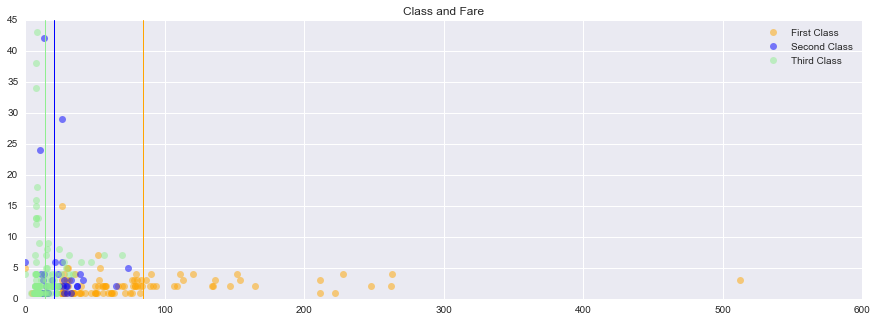

In [607]:
# I read from the web that the class in this dataset is not determined by the price for the fare.
# So at the very end I'd like to draw a scatter plot to learn about the relationship between the fare price and the class.
# This is not relevant to my main question about survival rate. 
# And because there are many missing data, the actual value for average fare may be quite different than shown in the plot.
plt.figure(figsize = (15,5))
plt.plot(firstClass.groupby("Fare")["Fare"].count(),"o",color = "orange",alpha = 0.5,label = "First Class")
plt.plot(secondClass.groupby("Fare")["Fare"].count(),"o",color = "blue",alpha = 0.5,label = "Second Class")
plt.plot(thirdClass.groupby("Fare")["Fare"].count(),"o",color = "lightgreen",alpha = 0.5,label = "Third Class")
plt.title("Class and Fare")
plt.axvline(firstClass.Fare.mean(),linewidth=1, color='orange', ls='-')
plt.axvline(secondClass.Fare.mean(),linewidth=1, color='blue', ls='-')
plt.axvline(thirdClass.Fare.mean(),linewidth=1, color='lightgreen', ls='-')
plt.legend(loc = "best")
plt.show()

### Tentative Conclusion

We can draw some tentative conclusions from the analysis above. The conclusions are tentative because we haven't done any statistical tests to determine if the difference between groups are indeed significant; and the dataset that we have are quite limited with only 891 out of 2224 passengers and crew on board the Titanic, which is prone to error.  

The conclusions are:
- Children under 5 years old is very likely to survive the tragedy. 
- Boys and girls younger than 15 are equally likely to survive. 
- Female in general are more likely to survive than man, especially if they are in the first and second class.     
- Male are more likely to die in the tragedy, unless they are in the first class. 
- People in the first class are more likely to survive than others in general.  


In further analysis, we can do one sample or two sample t-tests and caculate the p and t value of each to check if our hypothesises (i.e. the tentative conclusions) are correct. In addition, we can get more data from other sources to add into the dataset so we have a better sample to work with. For instance, I would like to get the information of the missing age data for the passengers in the dataset. 
